In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [158]:
df = pd.read_csv(r"D:\Cognifyz Internship\Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [159]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [160]:
df.shape

(9551, 21)

In [161]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Level 3
### Task 1 - Predictive Modeling
#### Subtasks
    1.Build a regression model to predict the aggregate rating of a restaurant based on available features.
    2.Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.
    3.Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

##### Subtask - 1

In [163]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [164]:
data = df.copy()

In [165]:
# Select relevant features
numerical_cols = ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes']
numerical_cols

['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes']

In [166]:
categorical_cols = ['City', 'Cuisines', 'Has Table booking', 'Has Online delivery', 'Is delivering now']

In [167]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [168]:
binary_mapping = {'Yes': 1, 'No': 0}
data['Has Table booking'] = data['Has Table booking'].map(binary_mapping)
data['Has Online delivery'] = data['Has Online delivery'].map(binary_mapping)
data['Is delivering now'] = data['Is delivering now'].map(binary_mapping)

In [169]:
# For Cuisines, split and take only the first cuisine to avoid too many columns
data['Primary_Cuisine'] = data['Cuisines'].str.split(',').str[0]

In [170]:
# Create dummies for City and Primary_Cuisine
data = pd.get_dummies(data, columns=['City', 'Primary_Cuisine'])

In [171]:
# Select final features for modeling
selected_columns = (numerical_cols + ['Has Table booking', 'Has Online delivery', 'Is delivering now'] + [col for col in data.columns if col.startswith(('City_', 'Primary_Cuisine_'))])

In [172]:
X = data[selected_columns]
y = data['Aggregate rating']

In [173]:
print("Features shape:", X.shape)
print("\nFeature names:", X.columns.tolist())

Features shape: (9551, 268)

Feature names: ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'City_Abu Dhabi', 'City_Agra', 'City_Ahmedabad', 'City_Albany', 'City_Allahabad', 'City_Amritsar', 'City_Ankara', 'City_Armidale', 'City_Athens', 'City_Auckland', 'City_Augusta', 'City_Aurangabad', 'City_Balingup', 'City_Bandung', 'City_Bangalore', 'City_Beechworth', 'City_Bhopal', 'City_Bhubaneshwar', 'City_Birmingham', 'City_Bogor', 'City_Boise', 'City_Bras�_lia', 'City_Cape Town', 'City_Cedar Rapids/Iowa City', 'City_Chandigarh', 'City_Chatham-Kent', 'City_Chennai', 'City_Clatskanie', 'City_Cochrane', 'City_Coimbatore', 'City_Colombo', 'City_Columbus', 'City_Consort', 'City_Dalton', 'City_Davenport', 'City_Dehradun', 'City_Des Moines', 'City_Dicky Beach', 'City_Doha', 'City_Dubai', 'City_Dubuque', 'City_East Ballina', 'City_Edinburgh', 'City_Faridabad', 'City_Fernley', 'City_Flaxton', 'City_Forrest', 'C

##### Subtask - 2

In [174]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [176]:
print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)

Training set shape: (7640, 268)
Testing set shape: (1911, 268)


##### Subtask - 3

In [177]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\nMetrics for {model_name}:")
    print("-" * 50)
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")
    
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

In [178]:
# Train and evaluate Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_metrics = evaluate_model(y_test, lr_pred, "Linear Regression")


Metrics for Linear Regression:
--------------------------------------------------
RMSE: 4659571831196.1660
MAE: 184092270220.5996
R2 Score: -9538914763095178557259776.0000


In [179]:
# Train and evaluate Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_metrics = evaluate_model(y_test, dt_pred, "Decision Tree")


Metrics for Decision Tree:
--------------------------------------------------
RMSE: 0.4161
MAE: 0.2685
R2 Score: 0.9239


In [180]:
# Train and evaluate Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_metrics = evaluate_model(y_test, rf_pred, "Random Forest")


Metrics for Random Forest:
--------------------------------------------------
RMSE: 0.2952
MAE: 0.1934
R2 Score: 0.9617


In [181]:
# Visualize results
def plot_model_comparison(metrics_dict):
    models = list(metrics_dict.keys())
    metrics = pd.DataFrame({
        model: values for model, values in metrics_dict.items()
    }).T
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot RMSE
    metrics['RMSE'].plot(kind='bar', ax=axes[0])
    axes[0].set_title('RMSE Comparison')
    axes[0].set_ylabel('RMSE')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Plot MAE
    metrics['MAE'].plot(kind='bar', ax=axes[1])
    axes[1].set_title('MAE Comparison')
    axes[1].set_ylabel('MAE')
    axes[1].tick_params(axis='x', rotation=45)
    
    # Plot R2
    metrics['R2'].plot(kind='bar', ax=axes[2])
    axes[2].set_title('R2 Score Comparison')
    axes[2].set_ylabel('R2')
    axes[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

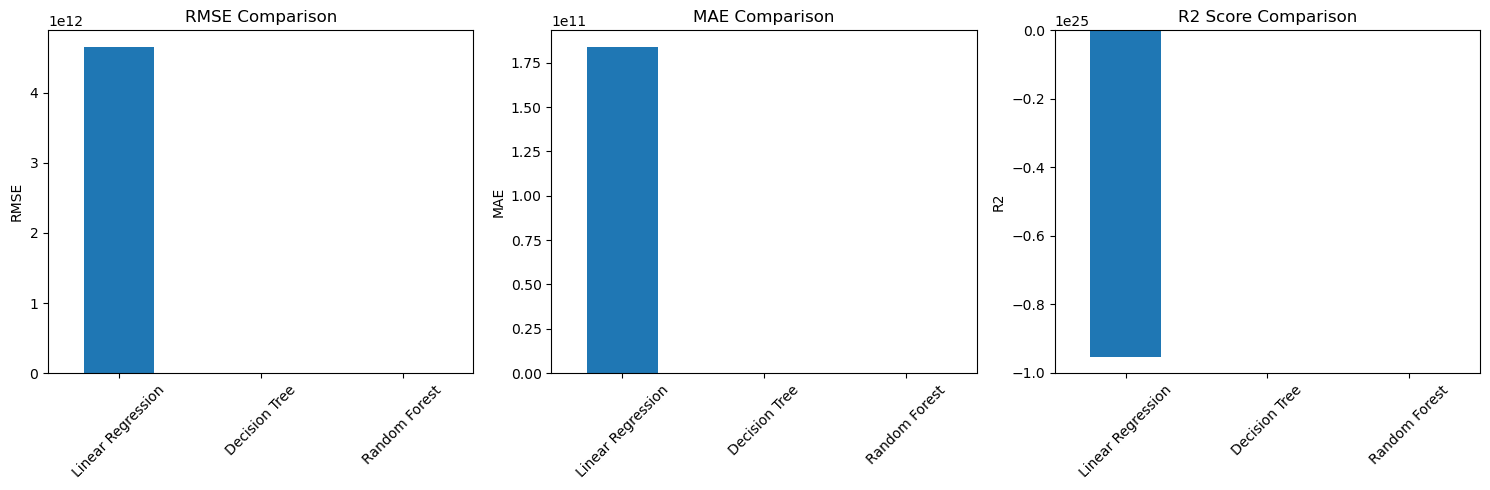

In [182]:
# Combine all metrics
all_metrics = {
    'Linear Regression': lr_metrics,
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics
}

plot_model_comparison(all_metrics)

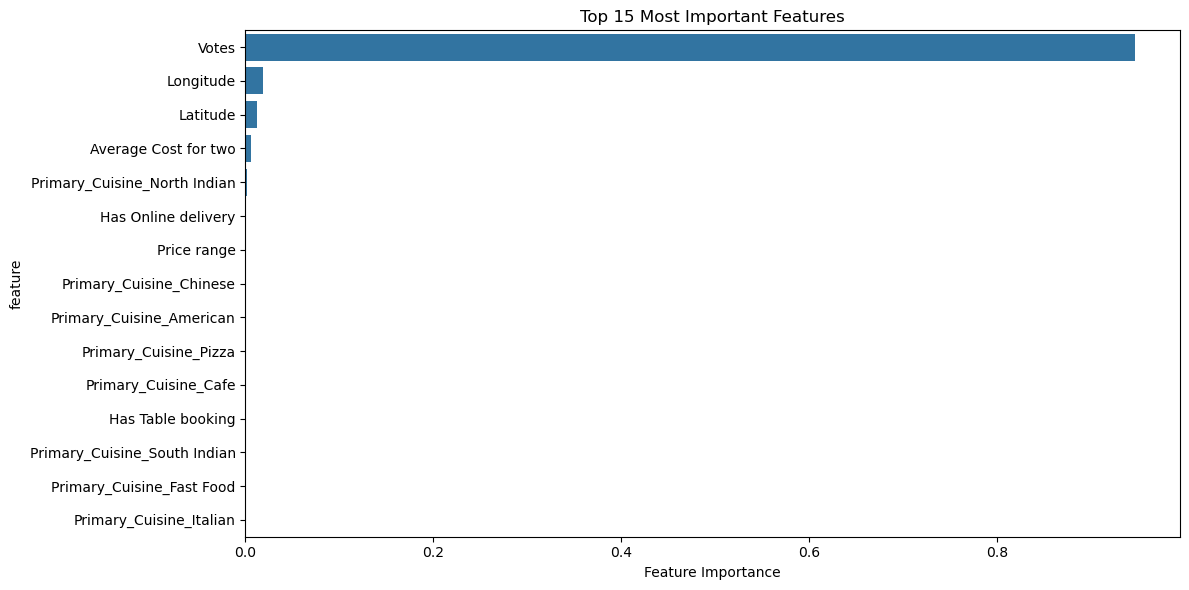

In [183]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

## Observations
    1.Random Forest is the best performing model with the lowest MSE and highest MAE score.
    2.Votes has the highest feature importance

## Level 3
### Task 2 - Customert Preference Analysis
#### Subtasks
    1.Analyze the relationship between the type of cuisine and the restaurant's rating.
    2.Identify the most popular cuisines among customers based on the number of votes.
    3.Determine if there are any specific cuisines that tend to receive higher ratings.

##### Subtask - 1

In [184]:
# Convert 'Cuisines' into individual cuisines
df["Cuisines"] = df["Cuisines"].astype(str).apply(lambda x: x.split(",")[0])  # Keep only the first cuisine

In [185]:
# Calculate average rating per cuisine
cuisine_ratings = df.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False)

In [186]:
# Top 10 cuisines with highest average ratings
print("\n Top 10 Cuisines with Highest Average Ratings:")
top_cuisine_ratings = cuisine_ratings.head(10)
print(top_cuisine_ratings)



 Top 10 Cuisines with Highest Average Ratings:
Cuisines
Sunda            4.900000
Scottish         4.700000
Cajun            4.700000
Taiwanese        4.650000
Filipino         4.616667
Persian          4.600000
Ramen            4.600000
World Cuisine    4.500000
Argentine        4.500000
Hawaiian         4.480000
Name: Aggregate rating, dtype: float64


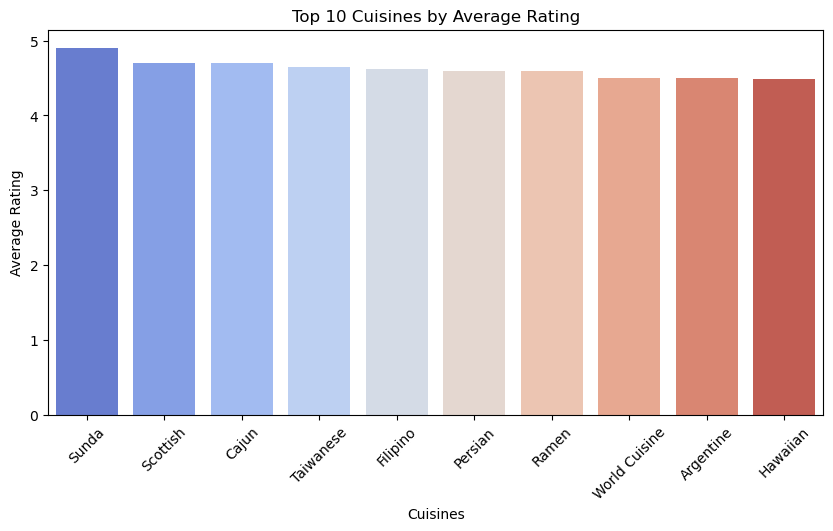

In [187]:
# Visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cuisine_ratings.index, y=top_cuisine_ratings.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Cuisines")
plt.ylabel("Average Rating")
plt.title("Top 10 Cuisines by Average Rating")
plt.show()

##### Subtask - 2

In [188]:
# Calculate total votes per cuisine
cuisine_votes = df.groupby("Cuisines")["Votes"].sum().sort_values(ascending=False)
cuisine_votes

Cuisines
North Indian      356684
Cafe              116576
American          105447
Italian            95153
Continental        94569
                   ...  
Singaporean           58
Drinks Only           45
Afghani               44
Peruvian               5
Cuisine Varies         2
Name: Votes, Length: 120, dtype: int64

In [189]:
# Top 10 cuisines with most votes
print("\n Top 10 Cuisines with Most Votes:")
top_cuisine_votes = cuisine_votes.head(10)
top_cuisine_votes



 Top 10 Cuisines with Most Votes:


Cuisines
North Indian    356684
Cafe            116576
American        105447
Italian          95153
Continental      94569
Chinese          84918
European         45842
Fast Food        42617
Bakery           42008
Pizza            36415
Name: Votes, dtype: int64

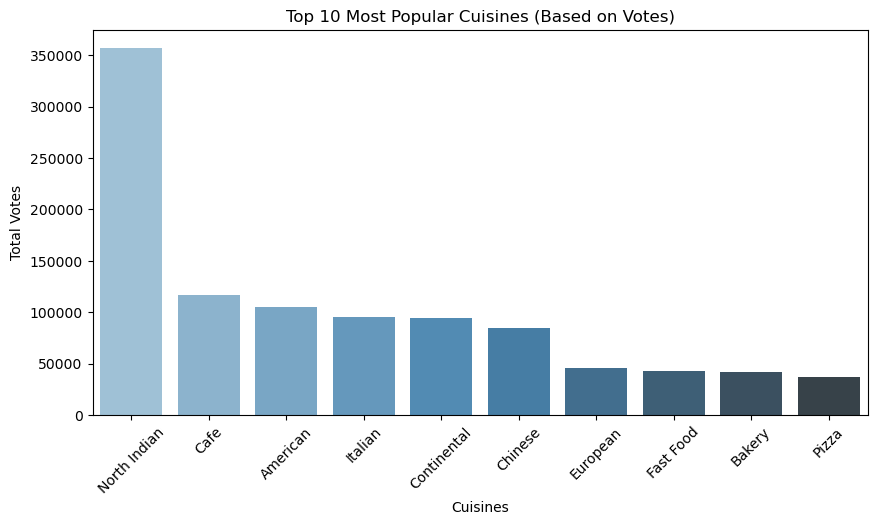

In [190]:
# Visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cuisine_votes.index, y=top_cuisine_votes.values, palette="Blues_d")
plt.xticks(rotation=45)
plt.xlabel("Cuisines")
plt.ylabel("Total Votes")
plt.title("Top 10 Most Popular Cuisines (Based on Votes)")
plt.show()

##### Subtask - 3

In [191]:
# Convert 'Cuisines' column to string and extract the first cuisine (if multiple)
df["Cuisines"] = df["Cuisines"].astype(str).apply(lambda x: x.split(",")[0].strip())

# Remove cuisines with missing ratings
df = df[df["Aggregate rating"] > 0]

# Calculate the average rating for each cuisine
cuisine_ratings = df.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False)

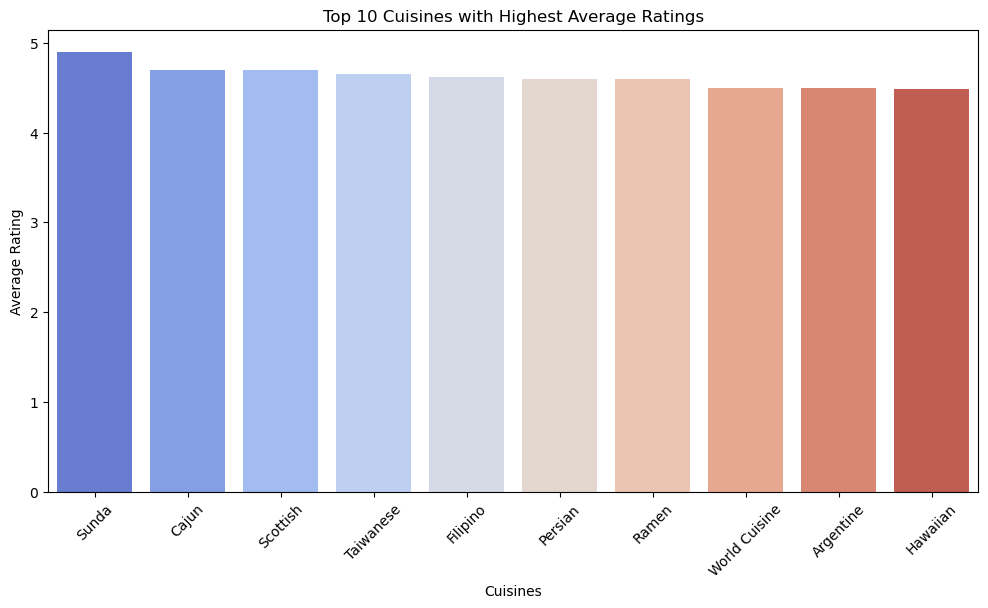

In [192]:
# Select top 10 cuisines with the highest average ratings
top_cuisine_ratings = cuisine_ratings.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisine_ratings.index, y=top_cuisine_ratings.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Cuisines")
plt.ylabel("Average Rating")
plt.title("Top 10 Cuisines with Highest Average Ratings")
plt.show()

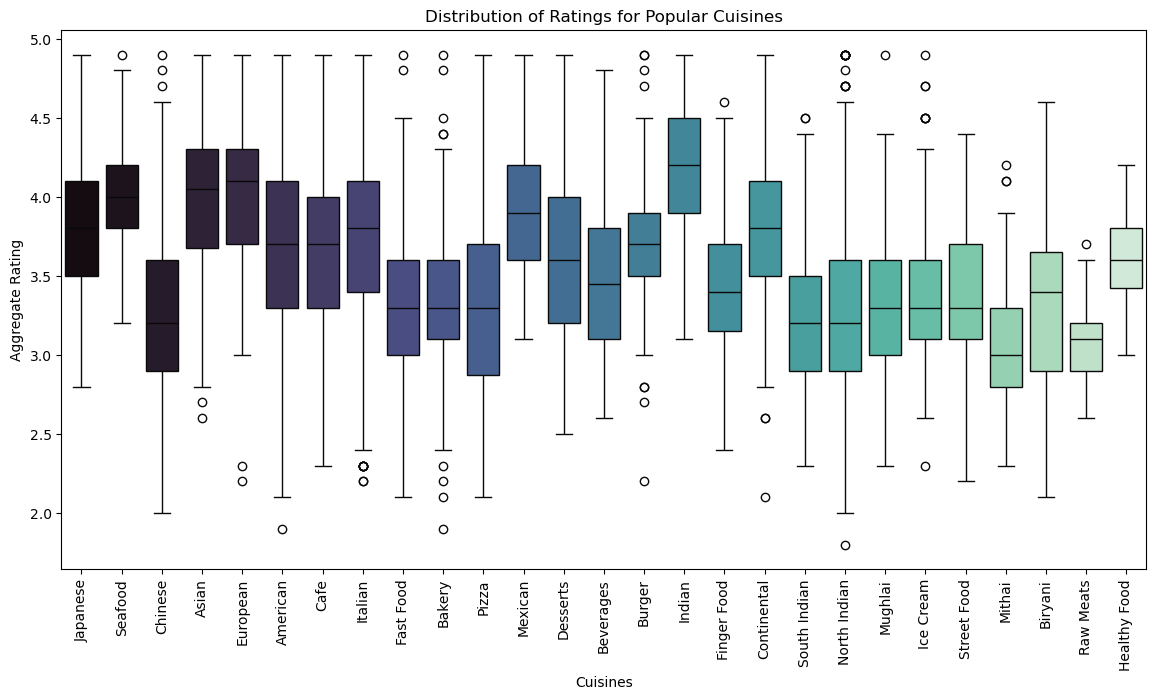

In [193]:
cuisine_counts = df["Cuisines"].value_counts()
popular_cuisines = cuisine_counts[cuisine_counts >= 30].index  # Only keep cuisines appearing 30+ times
filtered_df = df[df["Cuisines"].isin(popular_cuisines)]

plt.figure(figsize=(14, 7))
sns.boxplot(data=filtered_df, x="Cuisines", y="Aggregate rating", palette="mako")
plt.xticks(rotation=90)
plt.xlabel("Cuisines")
plt.ylabel("Aggregate Rating")
plt.title("Distribution of Ratings for Popular Cuisines")
plt.show()

## Observations
    1.Sunda is having the highest average rating
    2.North India has the most popular cuisines based on votes

## Level 3
### Task 3 - Data Visualisation
#### Subtasks
    1.Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).
    2.Compare the average ratings of different cuisines or cities using appropriate visualizations.
    3.Visualize the relationship between various features and the target variable to gain insights.

##### Subtask - 1

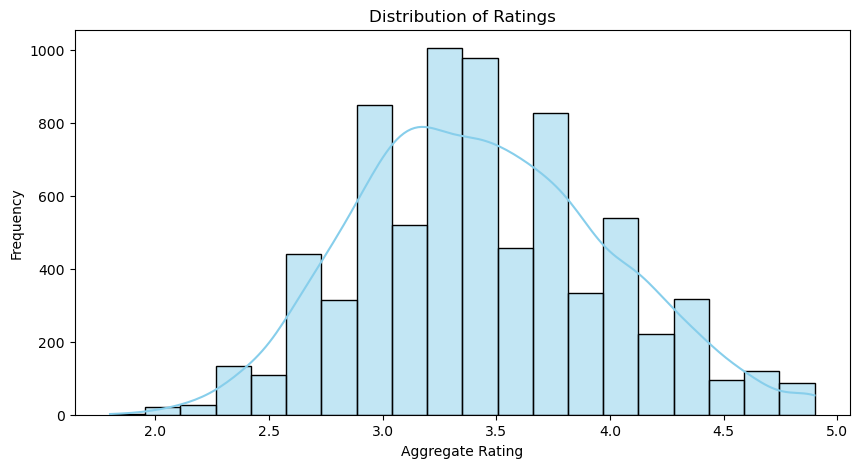

In [194]:
# Histogram: Rating Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Aggregate rating"], bins=20, kde=True, color="skyblue")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")
plt.show()

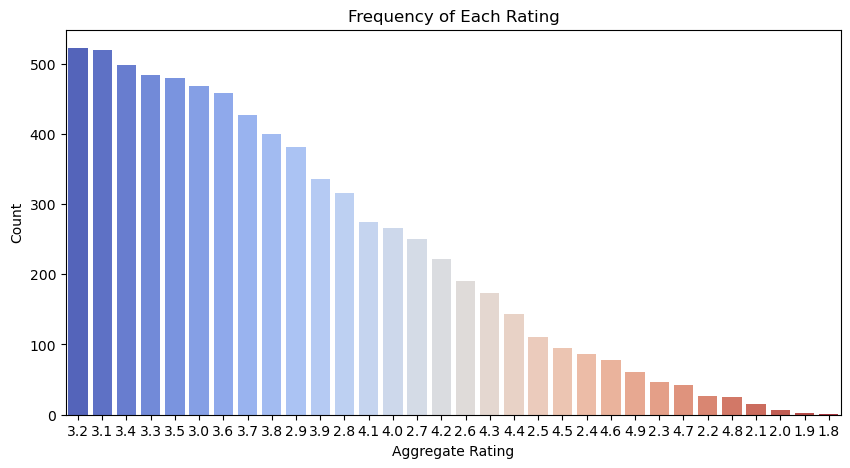

In [195]:
# Bar Plot: Count of Different Ratings
plt.figure(figsize=(10, 5))
sns.countplot(x="Aggregate rating", data=df, palette="coolwarm", order=df["Aggregate rating"].value_counts().index)
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.title("Frequency of Each Rating")
plt.show()

##### Subtask - 2

In [196]:
# Convert 'Cuisines' to string and extract first cuisine
df["Cuisines"] = df["Cuisines"].astype(str).apply(lambda x: x.split(",")[0].strip())
df["Cuisines"]

0                French
1              Japanese
2               Seafood
3              Japanese
4              Japanese
             ...       
9546            Turkish
9547      World Cuisine
9548            Italian
9549    Restaurant Cafe
9550               Cafe
Name: Cuisines, Length: 7403, dtype: object

In [197]:
# Calculate average rating per cuisine (top 10)
top_cuisine_ratings = df.groupby("Cuisines")["Aggregate rating"].mean().nlargest(10)
top_cuisine_ratings

Cuisines
Sunda            4.900000
Cajun            4.700000
Scottish         4.700000
Taiwanese        4.650000
Filipino         4.616667
Persian          4.600000
Ramen            4.600000
Argentine        4.500000
World Cuisine    4.500000
Hawaiian         4.480000
Name: Aggregate rating, dtype: float64

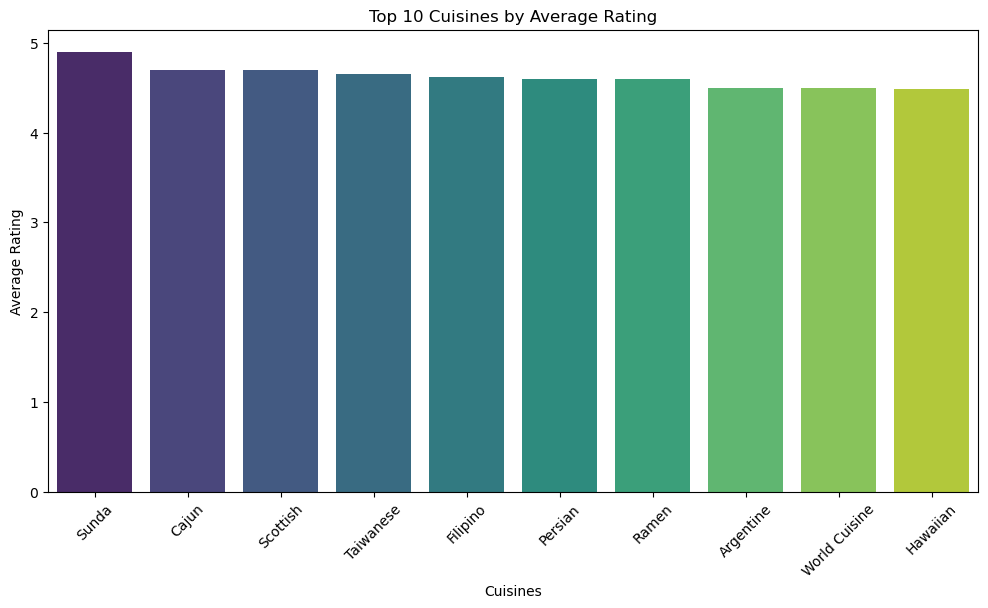

In [198]:
# Bar plot: Average ratings of top 10 cuisines
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisine_ratings.index, y=top_cuisine_ratings.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Cuisines")
plt.ylabel("Average Rating")
plt.title("Top 10 Cuisines by Average Rating")
plt.show()

In [199]:
# Calculate average rating per city (top 10)
top_city_ratings = df.groupby("City")["Aggregate rating"].mean().nlargest(10)
top_city_ratings

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Lincoln             4.500000
Secunderabad        4.500000
Name: Aggregate rating, dtype: float64

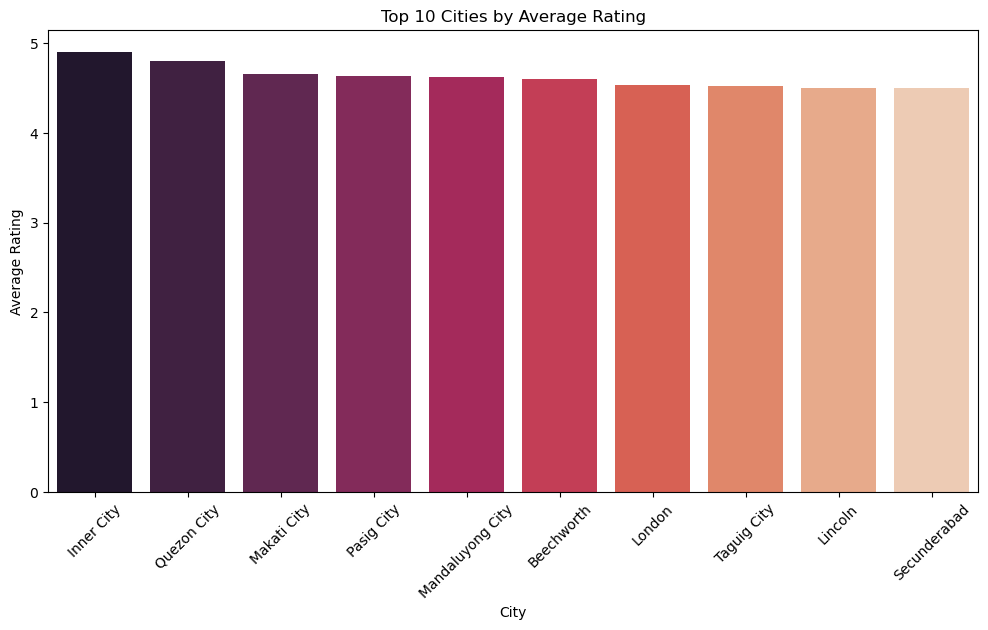

In [200]:
# Bar plot: Average ratings of top 10 cities
plt.figure(figsize=(12, 6))
sns.barplot(x=top_city_ratings.index, y=top_city_ratings.values, palette="rocket")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.title("Top 10 Cities by Average Rating")
plt.show()

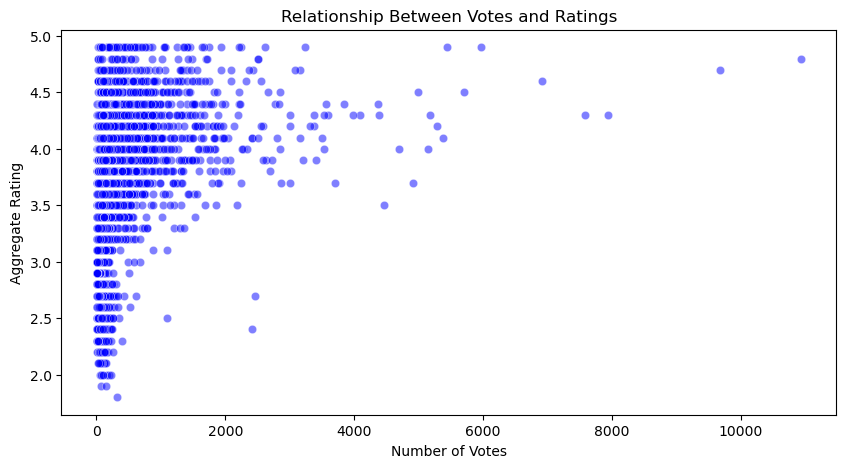

In [201]:
# Scatter Plot: Rating vs. Number of Votes
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Votes", y="Aggregate rating", data=df, color="blue", alpha=0.5)
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.title("Relationship Between Votes and Ratings")
plt.show()

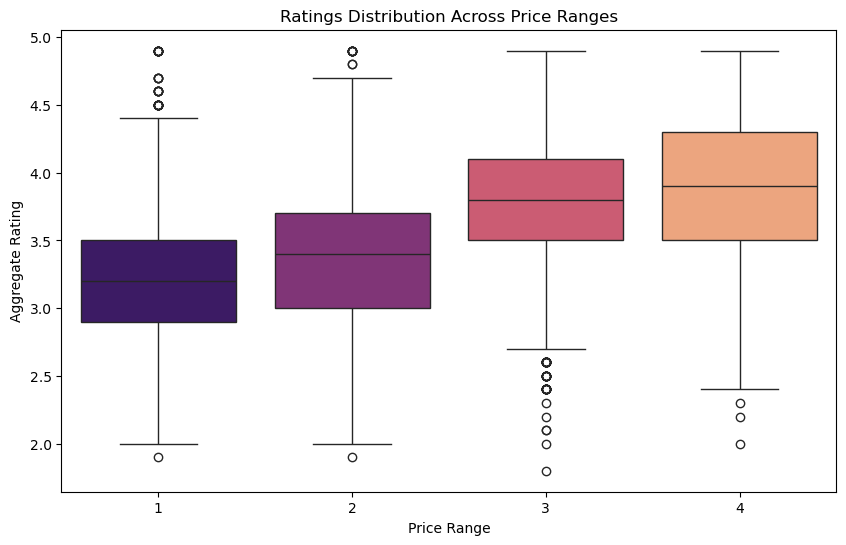

In [202]:
# Box Plot: Rating Distribution by Price Range
plt.figure(figsize=(10, 6))
sns.boxplot(x="Price range", y="Aggregate rating", data=df, palette="magma")
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.title("Ratings Distribution Across Price Ranges")
plt.show()

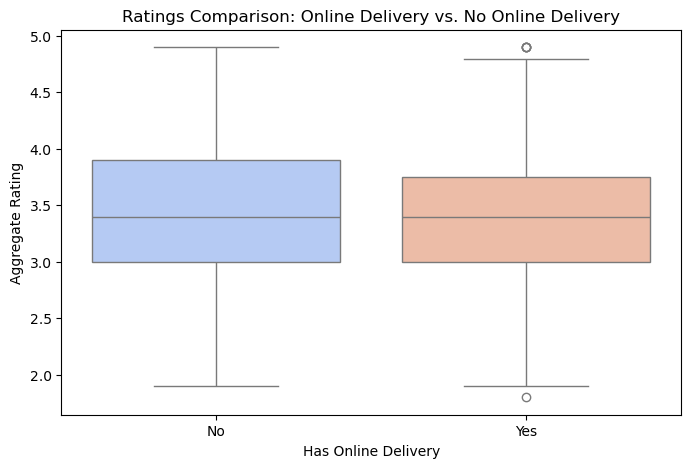

In [203]:
# Box Plot: Rating Distribution by Online Delivery Availability
plt.figure(figsize=(8, 5))
sns.boxplot(x="Has Online delivery", y="Aggregate rating", data=df, palette="coolwarm")
plt.xlabel("Has Online Delivery")
plt.ylabel("Aggregate Rating")
plt.title("Ratings Comparison: Online Delivery vs. No Online Delivery")
plt.show()


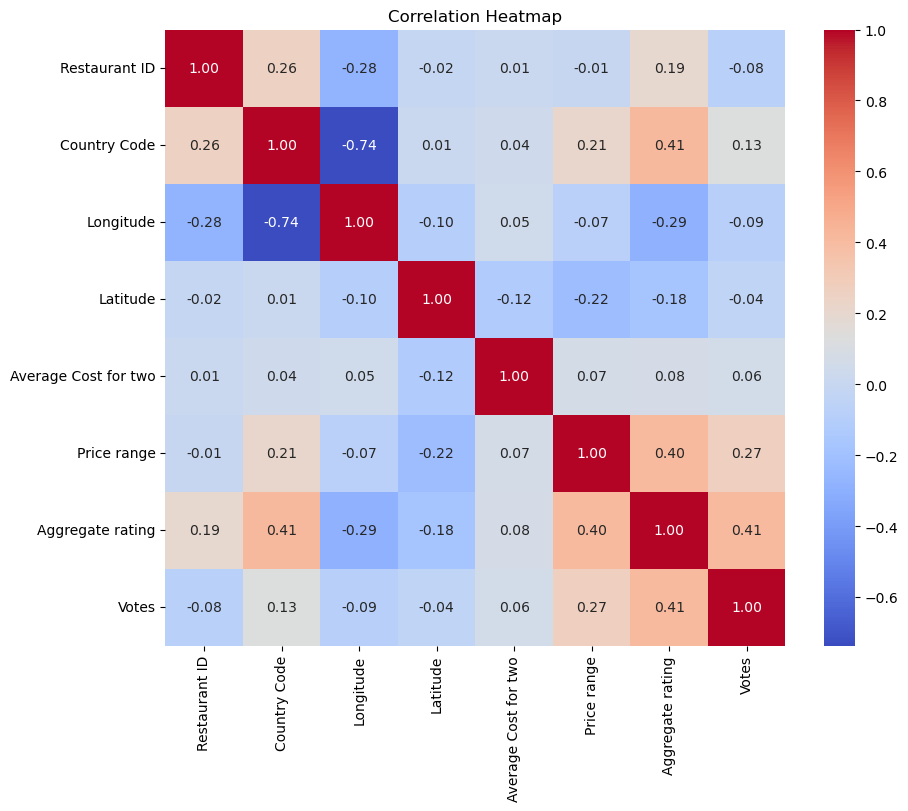

In [204]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
numerical_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

## Observations
Provides insights into the distribution of ratings, comparison of average ratings across cuisines or cities, and the relationship between features and the target variable. The visualizations help in understanding key patterns and trends that could drive decision-making.